# Simple character recognition with Keras (notMNIST dataset)
Paul Lacorre - November 12, 2021

Adapted from https://keras.io/examples/vision/mnist_convnet/.

Train a dense neural network and a convolutional neural network on the notMNIST dataset.

In [1]:
import numpy as np
import pandas as pd
import pickle
from keras import Input, Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
import keras.layers as layers
from tensorflow.keras.optimizers import Adam #, SGD, RMSprop, Adamax # https://github.com/tensorflow/tensorflow/issues/23728

import matplotlib.pyplot as plt
%matplotlib inline

class_index_to_letter = ['A','B','C','D','E','F','G','H','I','J'] # == list('ABCDEFGHIJ')
nb_classes = len(class_index_to_letter)

In [2]:
pickle_file = 'notMNIST.pickle' # (the pickled dataset is not provided in this GitHub repository)

try:
    f = open(pickle_file, 'rb')
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels  = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels  = save['valid_labels']
    test_dataset  = save['test_dataset']
    test_labels   = save['test_labels']
    f.close()
    print('Data loaded from', pickle_file)
except Exception as e:
    print('Unable to load data from', pickle_file, ':', e)
    raise

Data loaded from notMNIST.pickle


In [3]:
N_train = 100000
N_test = 10000

# Prepare training data
samples, width, height = train_dataset.shape
x_train = np.reshape(train_dataset[:N_train,:,:], (N_train,width*height))
y_train = train_labels[:N_train]

# Prepare testing data
samples, width, height = test_dataset.shape
x_test = np.reshape(test_dataset[:N_test,:,:], (N_test,width*height))
y_test = test_labels[:N_test]

# Normalize
x_train = np.interp(x_train, [-0.5,-0.49],[0,1])
x_test  = np.interp(x_test, [-0.5,-0.49],[0,1])

# Create "categorical" = one-hot vectors (3 <-> [0 0 1 0])
y_train_cat = np_utils.to_categorical(y_train, num_classes=nb_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes=nb_classes)
print(y_test.shape)
print(y_test_cat.shape)

(10000,)
(10000, 10)


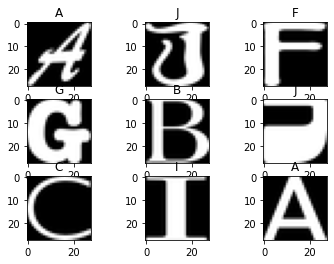

In [4]:
# Display samples
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i,:].reshape(28,28), cmap='gray')
    plt.title(f"{class_index_to_letter[y_test[i]]}")

In [5]:
# DENSE, 3 hidden layers
model1=Sequential()
model1.add(Dense(512, input_shape=(x_train.shape[1],)))
model1.add(Activation('relu')) # sets the activation function of the previous layer
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

In [6]:
model1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [7]:
batch_size=20
epochs=10

# Training
model1.fit(x_train, y_train_cat,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test_cat))

Epoch 1/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.5099 - accuracy: 0.8452 - val_loss: 0.2358 - val_accuracy: 0.9305
Epoch 2/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.3870 - accuracy: 0.8805 - val_loss: 0.1843 - val_accuracy: 0.9424
Epoch 3/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.3345 - accuracy: 0.8957 - val_loss: 0.2007 - val_accuracy: 0.9386
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.3016 - accuracy: 0.9043 - val_loss: 0.1633 - val_accuracy: 0.9484
Epoch 5/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2698 - accuracy: 0.9134 - val_loss: 0.1680 - val_accuracy: 0.9506
Epoch 6/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2449 - accuracy: 0.9205 - val_loss: 0.1726 - val_accuracy: 0.9471
Epoch 7/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2197 - accuracy: 0.9294 - val_loss: 0.1793 - val_ac

In [8]:
# Accuracy
score, acc = model1.evaluate(x_test, y_test_cat,batch_size=batch_size)
print('Test Score:', score)
print('Test Accuracy:', acc*100)

500/500 [==============================] - 1s 1ms/step - loss: 0.2177 - accuracy: 0.9528
Test Score: 0.21768024563789368
Test Accuracy: 95.27999758720398


---

# CNN (Convolutional Neural Network)

https://keras.io/examples/vision/mnist_convnet/

The shape of `x_train` is now `(28,28,1)`.

In [9]:
N_train = 50000
N_test = 5000

# Prepare training data
samples, width, height = train_dataset.shape
x_train = np.reshape(train_dataset[:N_train,:,:], (N_train,width,height))
y_train = train_labels[:N_train]

# Prepare testing data
samples, width, height = test_dataset.shape
x_test = np.reshape(test_dataset[:N_test,:,:], (N_test,width,height))
y_test = test_labels[:N_test]

# Normalize
x_train = np.interp(x_train,[-0.5,-0.49],[0,1])
x_test  = np.interp(x_test,[-0.5,-0.49],[0,1])

# Create "categorical" = one-hot vectors (3 <-> [0 0 1 0])
y_train_cat = np_utils.to_categorical(y_train, num_classes=nb_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes=nb_classes)
print(y_test.shape)
print(y_test_cat.shape)

(5000,)
(5000, 10)


In [10]:
# CONV
model2 = Sequential(
    [
        Input(shape=(width,height,1)),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"), # 32 features per 4x4 pixel groups
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # 64 features per 3x3 pixel groups
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(nb_classes, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)              

In [11]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [12]:
batch_size = 64
epochs = 15

# Training
model2.fit(x_train, y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_cat))

Epoch 1/15
782/782 [==============================] - 11s 14ms/step - loss: 0.8969 - accuracy: 0.7355 - val_loss: 0.4050 - val_accuracy: 0.8914
Epoch 2/15
782/782 [==============================] - 11s 14ms/step - loss: 0.6192 - accuracy: 0.8255 - val_loss: 0.3235 - val_accuracy: 0.9074
Epoch 3/15
782/782 [==============================] - 11s 14ms/step - loss: 0.5646 - accuracy: 0.8418 - val_loss: 0.2850 - val_accuracy: 0.9180
Epoch 4/15
782/782 [==============================] - 11s 14ms/step - loss: 0.5366 - accuracy: 0.8485 - val_loss: 0.2731 - val_accuracy: 0.9264
Epoch 5/15
782/782 [==============================] - 11s 14ms/step - loss: 0.5159 - accuracy: 0.8542 - val_loss: 0.2620 - val_accuracy: 0.9270
Epoch 6/15
782/782 [==============================] - 11s 14ms/step - loss: 0.5032 - accuracy: 0.8559 - val_loss: 0.2449 - val_accuracy: 0.9318
Epoch 7/15
782/782 [==============================] - 11s 14ms/step - loss: 0.4919 - accuracy: 0.8609 - val_loss: 0.2430 - val_accuracy:

In [13]:
# Accuracy
score, acc = model2.evaluate(x_test, y_test_cat, batch_size=batch_size)
print('Test Score:', score) # == test val_loss
print('Test Accuracy:', acc*100)

79/79 [==============================] - 0s 6ms/step - loss: 0.2122 - accuracy: 0.9402
Test Score: 0.21223537623882294
Test Accuracy: 94.01999711990356


## Concluding remarks
* The CNN achieves a test accuracy of 94% with only 24k parameters while the dense NN has 95% test accuracy with 670k parameters.
* Training the CNN takes less time than training the dense NN.

As we know, the CNN architecture is well-suited for computer vision problems (analysis of spatially arranged information).

## Perspectives
* Find the best hyperparameters for the CNN
* Use a multilingual dataset of handwritten characters: https://github.com/brendenlake/omniglot/
* Take a look at the technologies involved in *words* recognition (segmentation) ([see here](https://nanonets.com/blog/deep-learning-ocr/))